In [87]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


#### Step 1: Load in the JSON files ####

In [88]:
# Load the data from JSON files
with open("followers_1.json", "r") as f:
    followers_data = json.load(f)

with open("following.json", "r") as f:
    following_data = json.load(f)

# Print sample data to understand the structure
print("Sample followers data:")
print(followers_data[:2])  # Print the first two records for followers

print("\nSample following data:")
print(following_data["relationships_following"][:2])  # Print the first two records for following



Sample followers data:
[{'title': '', 'media_list_data': [], 'string_list_data': [{'href': 'https://www.instagram.com/nxxelani', 'value': 'nxxelani', 'timestamp': 1735458644}]}, {'title': '', 'media_list_data': [], 'string_list_data': [{'href': 'https://www.instagram.com/chandni.jivrajani', 'value': 'chandni.jivrajani', 'timestamp': 1734870369}]}]

Sample following data:
[{'title': '', 'media_list_data': [], 'string_list_data': [{'href': 'https://www.instagram.com/nxxelani', 'value': 'nxxelani', 'timestamp': 1735453444}]}, {'title': '', 'media_list_data': [], 'string_list_data': [{'href': 'https://www.instagram.com/chandni.jivrajani', 'value': 'chandni.jivrajani', 'timestamp': 1734870663}]}]


In [89]:
# Inspect followers data
print("Followers Data Sample:")
print(followers_data[:2])  # Print the first 2 records of followers

# Inspect following data
print("\nFollowing Data Sample:")
print(following_data["relationships_following"][:2])  # Print the first 2 records of following


Followers Data Sample:
[{'title': '', 'media_list_data': [], 'string_list_data': [{'href': 'https://www.instagram.com/nxxelani', 'value': 'nxxelani', 'timestamp': 1735458644}]}, {'title': '', 'media_list_data': [], 'string_list_data': [{'href': 'https://www.instagram.com/chandni.jivrajani', 'value': 'chandni.jivrajani', 'timestamp': 1734870369}]}]

Following Data Sample:
[{'title': '', 'media_list_data': [], 'string_list_data': [{'href': 'https://www.instagram.com/nxxelani', 'value': 'nxxelani', 'timestamp': 1735453444}]}, {'title': '', 'media_list_data': [], 'string_list_data': [{'href': 'https://www.instagram.com/chandni.jivrajani', 'value': 'chandni.jivrajani', 'timestamp': 1734870663}]}]


In [90]:
# Check for duplicates or empty entries in followers
followers_usernames = [item["string_list_data"][0]["value"] for item in followers_data]
print(f"Unique followers: {len(set(followers_usernames))}")
print(f"Duplicates in followers: {len(followers_usernames) - len(set(followers_usernames))}")

# Check for duplicates or empty entries in following
following_usernames = [item["string_list_data"][0]["value"] for item in following_data["relationships_following"]]
print(f"Unique following: {len(set(following_usernames))}")
print(f"Duplicates in following: {len(following_usernames) - len(set(following_usernames))}")


Unique followers: 1074
Duplicates in followers: 0
Unique following: 1026
Duplicates in following: 0


#### Step 2: Convert Data into Pandas Dataframe ####

In [91]:
# Extract followers' usernames
followers = [item["string_list_data"][0]["value"] for item in followers_data]
followers_df = pd.DataFrame(followers, columns=["username"])

# Extract following usernames
following = [item["string_list_data"][0]["value"] for item in following_data["relationships_following"]]
following_df = pd.DataFrame(following, columns=["username"])

# Print the first few rows of each DataFrame
print("Followers DataFrame:")
print(followers_df.head())

print("\nFollowing DataFrame:")
print(following_df.head())


Followers DataFrame:
            username
0           nxxelani
1  chandni.jivrajani
2      hargun.kkohli
3        savitha15_m
4          robfromhb

Following DataFrame:
            username
0           nxxelani
1  chandni.jivrajani
2      hargun.kkohli
3        savitha15_m
4     simply.yamomma


In [92]:
# Extract followers' usernames and timestamps
followers = [
    {
        "username": item["string_list_data"][0]["value"],
        "timestamp": item["string_list_data"][0]["timestamp"]
    }
    for item in followers_data
]

followers_df = pd.DataFrame(followers)

# Extract following usernames and timestamps
following = [
    {
        "username": item["string_list_data"][0]["value"],
        "timestamp": item["string_list_data"][0]["timestamp"]
    }
    for item in following_data["relationships_following"]
]

following_df = pd.DataFrame(following)

# Print the first few rows of each DataFrame
print("Followers DataFrame:")
print(followers_df.head())

print("\nFollowing DataFrame:")
print(following_df.head())


Followers DataFrame:
            username   timestamp
0           nxxelani  1735458644
1  chandni.jivrajani  1734870369
2      hargun.kkohli  1734660563
3        savitha15_m  1734506383
4          robfromhb  1734363104

Following DataFrame:
            username   timestamp
0           nxxelani  1735453444
1  chandni.jivrajani  1734870663
2      hargun.kkohli  1734653453
3        savitha15_m  1734451845
4     simply.yamomma  1734064744


In [110]:
len(followers_df)

1074

In [111]:
len(following_df)

1026

In [93]:
from datetime import datetime

# Convert followers' timestamps to datetime
followers_df["readable_timestamp"] = pd.to_datetime(followers_df["timestamp"], unit="s")

# Convert following's timestamps to datetime
following_df["readable_timestamp"] = pd.to_datetime(following_df["timestamp"], unit="s")

# Print the updated DataFrames
print("Followers DataFrame with readable timestamps:")
print(followers_df.head())

print("\nFollowing DataFrame with readable timestamps:")
print(following_df.head())


Followers DataFrame with readable timestamps:
            username   timestamp  readable_timestamp
0           nxxelani  1735458644 2024-12-29 07:50:44
1  chandni.jivrajani  1734870369 2024-12-22 12:26:09
2      hargun.kkohli  1734660563 2024-12-20 02:09:23
3        savitha15_m  1734506383 2024-12-18 07:19:43
4          robfromhb  1734363104 2024-12-16 15:31:44

Following DataFrame with readable timestamps:
            username   timestamp  readable_timestamp
0           nxxelani  1735453444 2024-12-29 06:24:04
1  chandni.jivrajani  1734870663 2024-12-22 12:31:03
2      hargun.kkohli  1734653453 2024-12-20 00:10:53
3        savitha15_m  1734451845 2024-12-17 16:10:45
4     simply.yamomma  1734064744 2024-12-13 04:39:04


#### Step 3: Find the Differences ####

Goal:\
Identify users who follow you but you don't follow back.\
Identify users who you follow but they don't follow you back.


In [94]:
# Find users who follow you but you don't follow back
followers_not_following_back = followers_df[~followers_df["username"].isin(following_df["username"])]

# Find users you follow but who don't follow you back
following_not_followed_back = following_df[~following_df["username"].isin(followers_df["username"])]

# Print results
print("People who follow you but you don't follow back:")
followers_not_following_back


People who follow you but you don't follow back:


,username,timestamp,readable_timestamp
75,lillysjuicebar,1723315868,2024-08-10 18:51:08
105,vzavala28,1716791822,2024-05-27 06:37:02
108,clonesyperifericos_usa,1714424669,2024-04-29 21:04:29
111,sunday.at.8,1712459486,2024-04-07 03:11:26
134,hamburglry,1698686506,2023-10-30 17:21:46
...,...,...,...
1041,alb1995,1353910005,2012-11-26 06:06:45
1043,eat_my_bagel,1352585028,2012-11-10 22:03:48
1046,tri_cera_top,1351907230,2012-11-03 01:47:10
1055,fakenews98765432,1345837505,2012-08-24 19:45:05


In [95]:
#Count of followers you don't follow back
followers_not_following_back.count()

username              238
timestamp             238
readable_timestamp    238
dtype: int64

In [96]:
print("\nPeople you follow but they don't follow you back:")
following_not_followed_back


People you follow but they don't follow you back:


,username,timestamp,readable_timestamp
8,manda_schoon,1733805919,2024-12-10 04:45:19
12,realtorbrittneyliz,1733287226,2024-12-04 04:40:26
37,lyssa_duran,1729885442,2024-10-25 19:44:02
55,feedthecatsucsd,1727977809,2024-10-03 17:50:09
60,sungodsoccerucsd,1727825560,2024-10-01 23:32:40
...,...,...,...
984,tiffanykalhor,1383286287,2013-11-01 06:11:27
992,aliviamaay,1368586353,2013-05-15 02:52:33
997,makennacarr,1361342738,2013-02-20 06:45:38
1019,_trregarro,1342032883,2012-07-11 18:54:43


In [97]:
#Count of accounts you follow but don't follow back
following_not_followed_back.count()

username              190
timestamp             190
readable_timestamp    190
dtype: int64

In [98]:
# Key Metrics
total_followers = len(followers_df)
total_following = len(following_df)
not_following_back_count = len(followers_not_following_back)
not_followed_back_count = len(following_not_followed_back)

# Print Metrics
print(f"Total Followers: {total_followers}")
print(f"Total Following: {total_following}")
print(f"People who follow you but you don't follow back: {not_following_back_count}")
print(f"People you follow but they don't follow you back: {not_followed_back_count}")


Total Followers: 1074
Total Following: 1026
People who follow you but you don't follow back: 238
People you follow but they don't follow you back: 190


#### Step 4: Visualize the Data ####

Start with pie chart with followers you don't follow back.

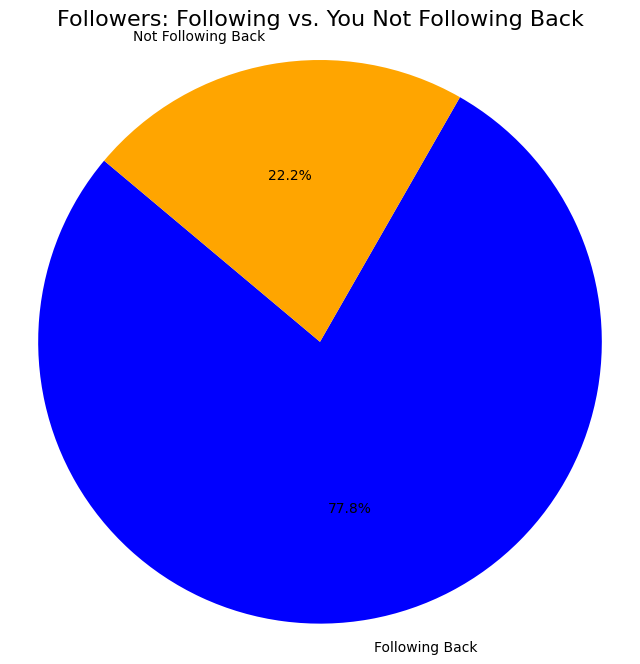

In [99]:
# Counts for pie chart
following_back_count = len(followers_df[followers_df['username'].isin(following_df['username'])])
not_following_back_count = len(followers_not_following_back)

# Data for pie chart
labels = ['Following Back', 'Not Following Back']
sizes = [following_back_count, not_following_back_count]
colors = ['blue', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Followers: Following vs. You Not Following Back', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()


From the pie chart we can see the percentage of users who follow you but you don't follow back. 22.2% of users follow you but you don't follow back and 77.8% of users you follow back.

Next, we can visualize the users who you follow but they don't follow you back.

C:\Users\anday\AppData\Local\Temp\ipykernel_28440\1533537943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  following_not_followed_back['year'] = pd.to_datetime(following_not_followed_back['readable_timestamp']).dt.year


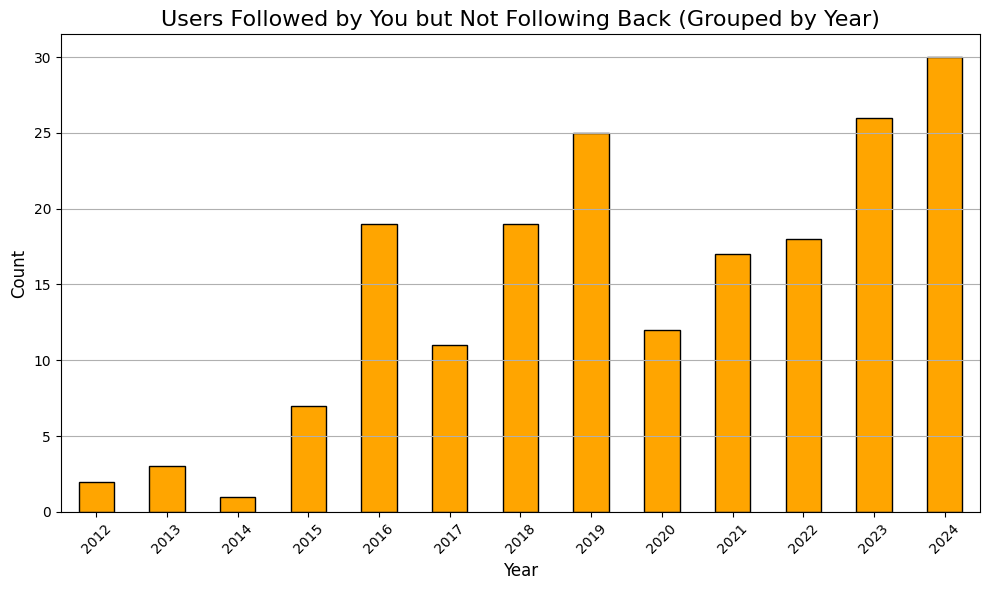

In [100]:
# Add 'year' column from readable_timestamp
following_not_followed_back['year'] = pd.to_datetime(following_not_followed_back['readable_timestamp']).dt.year

# Count users by year
not_followed_back_by_year = following_not_followed_back.groupby('year').size()

# Plot bar chart
plt.figure(figsize=(10, 6))
not_followed_back_by_year.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Users Followed by You but Not Following Back (Grouped by Year)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


A steady increase of accounts you follow but they don't follow you back. Year 2024 has the highest number of accounts you follow but they don't follow you back with over 30 accounts.

Bar Chart:

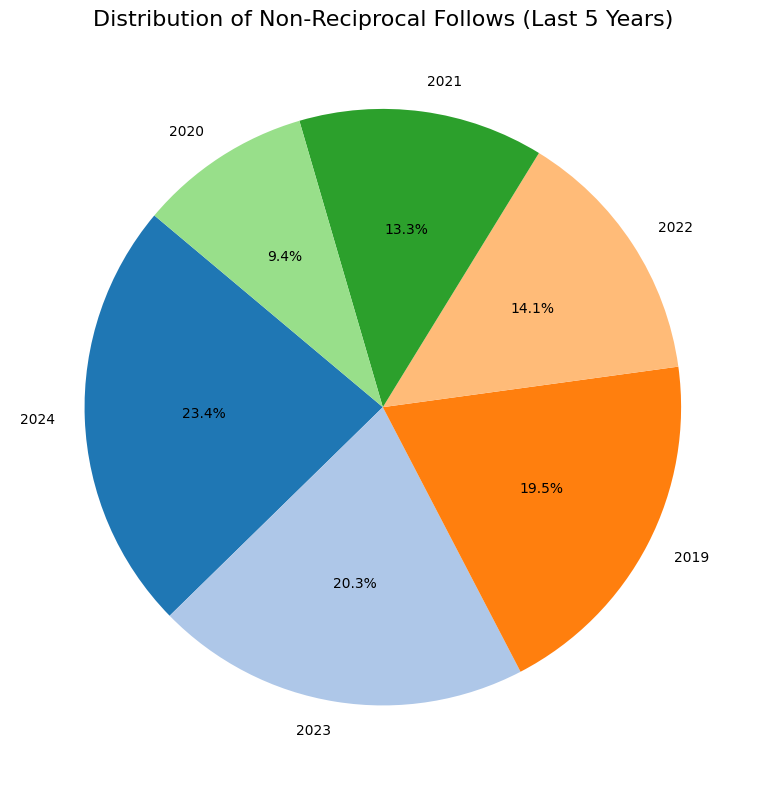

In [101]:
# Filter recent years (e.g., last 5 years)
recent_years = following_not_followed_back[following_not_followed_back['year'] >= 2019]

# Count by year for pie chart
recent_year_counts = recent_years['year'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
recent_year_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Non-Reciprocal Follows (Last 5 Years)", fontsize=16)
plt.ylabel("")  # Remove default y-axis label
plt.tight_layout()
plt.show()


A filtered Pie chart showing only accounts not following you back after 2019 and which year had the highest number of accounts not following you back.

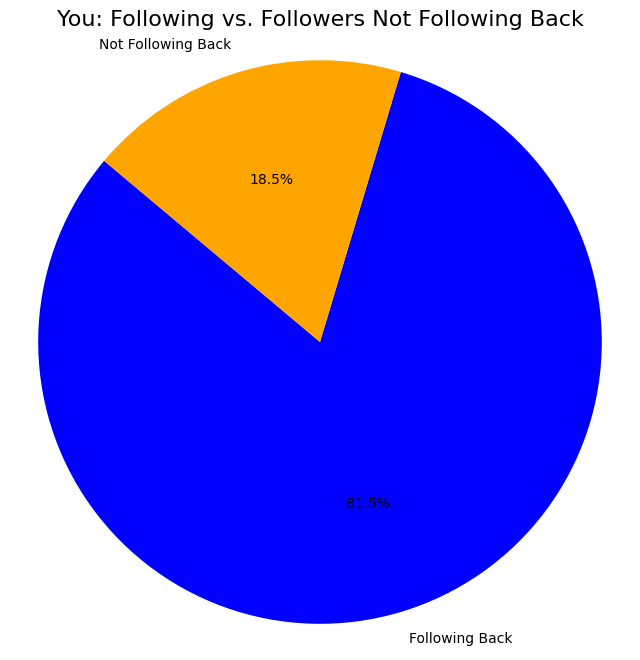

In [102]:
# Counts for pie chart
following_back_count = len(followers_df[followers_df['username'].isin(following_df['username'])])
not_following_back_count = len(following_not_followed_back)

# Data for pie chart
labels = ['Following Back', 'Not Following Back']
sizes = [following_back_count, not_following_back_count]
colors = ['blue', 'orange']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('You: Following vs. Followers Not Following Back', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()


81.5% of users you follow but they don't follow you total years. 18.5% of users follow you back total years.

TIME SERIES ANALYSIS:

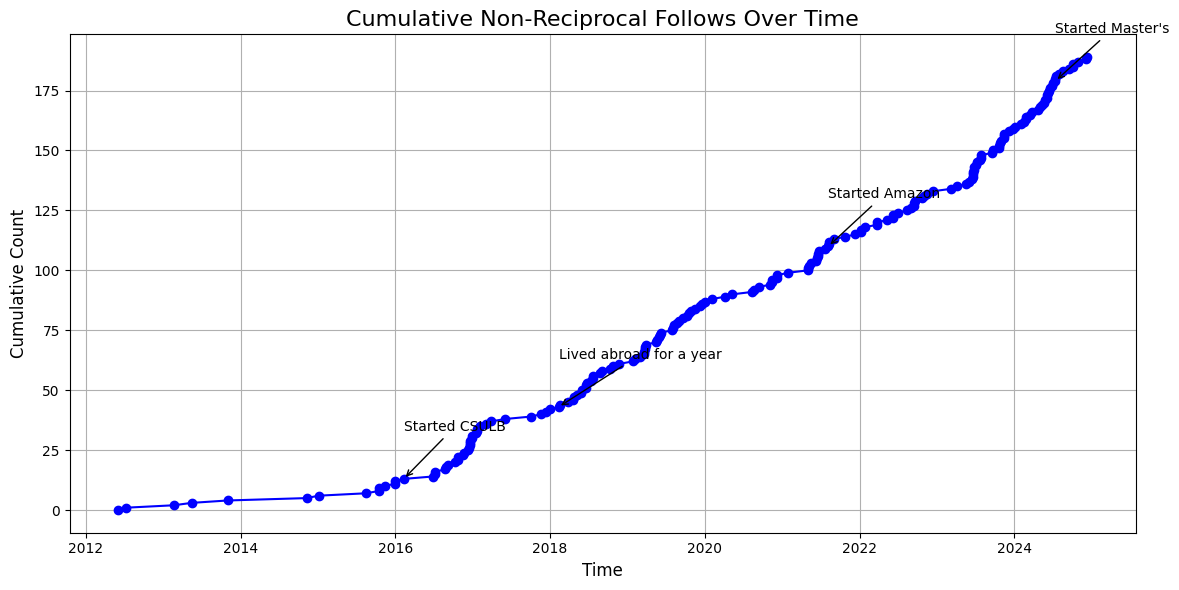

In [103]:
# Sort dataframe by timestamp
following_not_followed_back = following_not_followed_back.sort_values(by='timestamp')

# Annotate significant points in the chart
plt.figure(figsize=(12, 6))
plt.plot(following_not_followed_back['readable_timestamp'], range(len(following_not_followed_back)), marker='o', color='blue')
plt.title("Cumulative Non-Reciprocal Follows Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative Count", fontsize=12)
plt.grid(True)

# Example annotations
annotations = [
    ("2016-01-01", "Started CSULB"),
    ("2018-01-01", "Lived abroad for a year"),
    ("2021-08-01", "Started Amazon"),
    ("2024-07-01", "Started Master's"),
]

# Annotate each significant event
for date, label in annotations:
    # Find the corresponding y-coordinate (index of the timestamp)
    idx = following_not_followed_back['readable_timestamp'].searchsorted(date)
    if idx < len(following_not_followed_back):
        plt.annotate(
            label,
            xy=(following_not_followed_back['readable_timestamp'].iloc[idx], idx),
            xytext=(following_not_followed_back['readable_timestamp'].iloc[idx], idx + 20),
            arrowprops=dict(facecolor='black', arrowstyle="->"),
            fontsize=10,
            color="black"
        )

plt.tight_layout()
plt.show()



This visualization, titled "Cumulative Non-Reciprocal Follows Over Time," effectively shows how the count of people you follow who don't follow you back has increased over the years. The following insights can be drawn from this chart:

1. Steady Growth: There is a gradual but consistent increase in non-reciprocal follows over time. This suggests that as your social circle grew, the number of people who didn’t follow you back also increased steadily.

2. Key Growth Periods:

    You might notice periods where the growth is faster, potentially indicating times when you followed more users without receiving reciprocal follows. This could correlate with specific activities, like participating in events or expanding social reach during certain years.\
3. Long-Term Trends:

    The steady growth over the years could also point to typical behavior on platforms like Instagram, where users may follow others for updates or content without expecting a reciprocal follow.\
4. Cumulative Impact:

    The cumulative count reaching close to 200 by 2024 emphasizes the importance of regularly reviewing your connections if you're keen on optimizing mutual engagement.


### Bar Chart ###

Of total followers over the years.

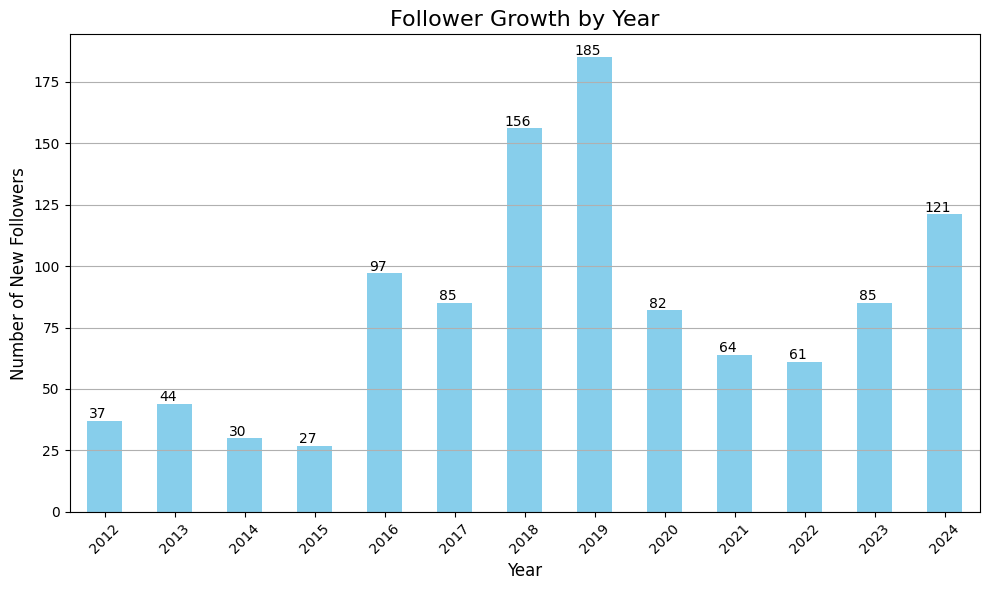

In [104]:
# Group by year and count
followers_df['year'] = followers_df['readable_timestamp'].dt.year
yearly_growth = followers_df.groupby('year').size()

# Add annotations to the bar chart
plt.figure(figsize=(10, 6))
bars = yearly_growth.plot(kind='bar', color='skyblue')
plt.title('Follower Growth by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of New Followers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Annotate bar heights
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,  # Position text in the middle of the bar
             bar.get_height() + 1,                     # Slightly above the bar
             int(bar.get_height()),                    # Display the count
             ha='center', fontsize=10, color='black')

plt.show()



From the bar chart, the years with most growth were between 2018 and 2019. The year with the most growth was 2019. 2019 had over 175 new followers, while 2018 had over 150 new followers.

#### Yearly Growth Rate ####

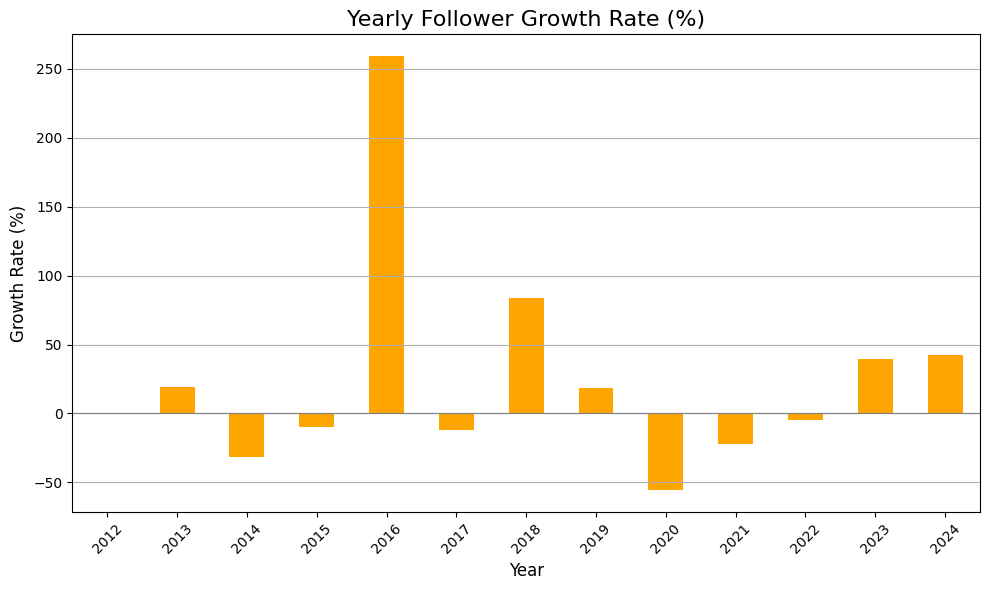

In [105]:
# Calculate percentage change
yearly_growth_pct = yearly_growth.pct_change() * 100

plt.figure(figsize=(10, 6))
yearly_growth_pct.plot(kind='bar', color='orange')
plt.title('Yearly Follower Growth Rate (%)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linewidth=0.8)  # Add a baseline at 0
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This graph represents the yearly follower growth rate in percentage, providing insight into how your Instagram following has changed over time. Here's what can be inferred from it:

Observations:\
Spike in 2016:

There is a significant growth rate above 250% in 2016, which could indicate a major event, campaign, or content that resonated well with your audience that year.\
Fluctuating Growth:

The growth rate alternates between positive and negative in some years, showing variability in follower dynamics. Negative values could suggest periods of decreased engagement or people unfollowing your account.\
Recent Stability:

From 2023 to 2024, the growth rate appears consistent and positive, suggesting sustained efforts to maintain or grow your audience.\
Periods of Decline:

Years like 2014, 2020, and 2022 show negative growth, indicating more followers were lost than gained during those times.


#### Step 5: Conclusion ####

A total of 238 followers that I do not follow back and a total of 190 accounts I follow but they don't follow me back. There is a total of 1074 followers compared to 1026 accounts I follow. The analysis provides a comprehensive overview of your Instagram engagement, focusing on mutual and non-reciprocal follows, follower growth, and the dynamics over the years.

The analysis provides a comprehensive overview of your Instagram engagement, focusing on mutual and non-reciprocal follows, follower growth, and the dynamics over the years.

1. Non-Reciprocal Follows:\
A significant proportion (22.2%) of followers don't receive a follow-back from you, suggesting opportunities to engage more with your audience.\
On the flip side, 81.5% of the people you follow don't follow you back, highlighting the potential for selective following or assessing the value of these connections.

2. Cumulative Growth:\
The cumulative chart shows steady growth in non-reciprocal follows, with noticeable spikes during certain periods. This could correlate with major personal milestones or platform activity trends.

3. Follower Growth:\
The years 2018 and 2019 saw the highest follower growth, potentially indicating periods of increased activity or successful content strategies.\
The significant growth rate in 2016 suggests a major event or campaign that resonated with your audience. In contrast, periods of negative growth in 2014, 2020, and 2022 indicate times where followers were lost, possibly due to changes in activity or audience interest.

4. Recent Trends:\
The follower growth rate has stabilized in recent years, suggesting consistency in content or engagement strategies.

5. Non-Reciprocal Distribution:\
From 2019 onwards, a gradual increase in non-reciprocal follows is observed, with 2024 being the highest year.


#### Recommendations: ####

1. Engagement Strategies:\
Identify and engage with the 22.2% of followers you don't follow back if they align with your goals or interests.\
Reassess the 81.5% of non-reciprocal follows. Unfollow users who no longer provide value to declutter your feed and focus on meaningful connections.

2. Content Optimization:\
Review the strategies or content that drove significant growth in 2016, 2018, and 2019, and attempt to replicate or adapt these for future engagement.\

3. Stabilize Declines:\
Investigate reasons for the negative growth in 2014, 2020, and 2022. Consider revamping content strategies or re-engaging with your audience during similar periods.\

4. Focus on Reciprocity:\
Use the insights to encourage mutual engagement, perhaps by directly interacting with followers or creating content that resonates more with those you follow.\

5. Track and Adapt:\
Continue monitoring yearly growth and cumulative trends to adapt strategies. Highlight any personal milestones or content shifts during periods of significant change for better contextual understanding.
